# IMPORT LIBRARIES

In [101]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [102]:
data=pd.read_csv('../Data/merged_data-final.csv', index_col=0)

In [103]:
data = data.iloc[::-1]
data

,Close(TCB),Close(ABI)
Date,,
05/04/2023,29050,32000
05/05/2023,28700,32000
05/08/2023,29400,32000
05/09/2023,29300,32000
05/10/2023,29300,32000
...,...,...
04/24/2024,47000,23800
04/25/2024,46150,23900
04/26/2024,46600,24400


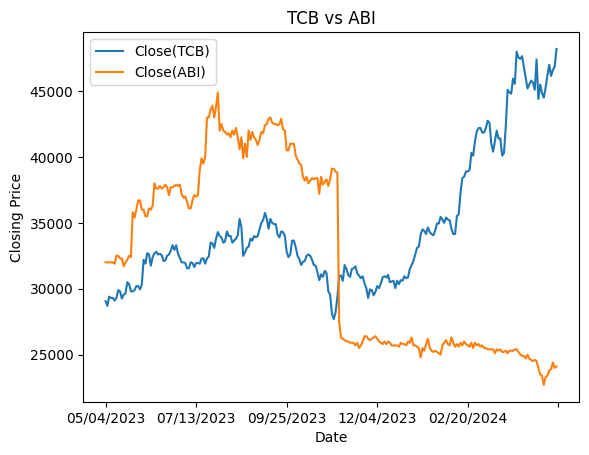

In [104]:
price = data
price.plot()
plt.title('TCB vs ABI')
plt.ylabel('Closing Price')
plt.show()


# Calculate the daily log returns and drop any NAs

Text(0, 0.5, 'Daily Log Returns')

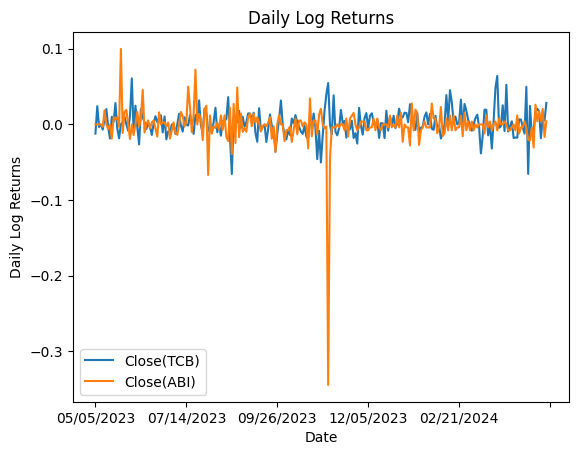

In [105]:
log_returns = np.log(data/data.shift(1)).dropna()
log_returns.plot()
plt.title('Daily Log Returns')
plt.ylabel('Daily Log Returns')

In [106]:
log_returns=log_returns.round(5)
log_returns

,Close(TCB),Close(ABI)
Date,,
05/05/2023,-0.01212,0.00000
05/08/2023,0.02410,0.00000
05/09/2023,-0.00341,0.00000
05/10/2023,0.00000,0.00000
05/11/2023,-0.00685,-0.00313
...,...,...
04/24/2024,0.01717,0.01695
04/25/2024,-0.01825,0.00419
04/26/2024,0.00970,0.02070


In [107]:
(log_returns).describe()

,Close(TCB),Close(ABI)
count,249.000000,249.000000
mean,0.002034,-0.001138
std,0.017869,0.026963
min,-0.065500,-0.344230
25%,-0.008530,-0.007720
50%,0.000000,0.000000
75%,0.011580,0.007690
max,0.064100,0.099790


# Create a weighted portfolio

In [108]:
# quantities = [3000000, 2000000]
# portfolio_value = [data.iloc[-1].iloc[0] * quantities[0],data.iloc[-1].iloc[1] * quantities[1]]
# portfolio_value

In [109]:
# total_portfolio_value = portfolio_value[0] + portfolio_value[1]


In [110]:
# weights = [
#     data.iloc[-1].iloc[0] * quantities[0] / total_portfolio_value,
#     data.iloc[-1].iloc[1] * quantities[1] / total_portfolio_value
# ]


In [111]:
total_portfolio_value = 10000
weights = [0.5,0.5]
portfolio_value = [total_portfolio_value * weight for weight in weights]
portfolio_value

[5000.0, 5000.0]

# Calculate the historical portfolio returns

In [112]:
historical_returns = (log_returns*weights).sum(axis=1)
historical_returns = historical_returns.round(5)
print(historical_returns)

Date
05/05/2023   -0.00606
05/08/2023    0.01205
05/09/2023   -0.00170
05/10/2023    0.00000
05/11/2023   -0.00499
               ...   
04/24/2024    0.01706
04/25/2024   -0.00703
04/26/2024    0.01520
05/02/2024   -0.00559
05/03/2024    0.01628
Length: 249, dtype: float64


In [113]:
historical_returns_df = pd.DataFrame(historical_returns)
historical_returns_df

,0
Date,
05/05/2023,-0.00606
05/08/2023,0.01205
05/09/2023,-0.00170
05/10/2023,0.00000
05/11/2023,-0.00499
...,...
04/24/2024,0.01706
04/25/2024,-0.00703
04/26/2024,0.01520


In [114]:
historical_returns_df.rename(columns={0:'Total Portfolio Returns'},inplace=True)
historical_returns_df

,Total Portfolio Returns
Date,
05/05/2023,-0.00606
05/08/2023,0.01205
05/09/2023,-0.00170
05/10/2023,0.00000
05/11/2023,-0.00499
...,...
04/24/2024,0.01706
04/25/2024,-0.00703
04/26/2024,0.01520


# Summerize Log Returns

In [115]:
# Calculate Percentages
total_returns_percentage = log_returns.merge(historical_returns_df, how = 'inner', left_index = True, right_index = True)
total_returns_percentage

,Close(TCB),Close(ABI),Total Portfolio Returns
Date,,,
05/05/2023,-0.01212,0.00000,-0.00606
05/08/2023,0.02410,0.00000,0.01205
05/09/2023,-0.00341,0.00000,-0.00170
05/10/2023,0.00000,0.00000,0.00000
05/11/2023,-0.00685,-0.00313,-0.00499
...,...,...,...
04/24/2024,0.01717,0.01695,0.01706
04/25/2024,-0.01825,0.00419,-0.00703
04/26/2024,0.00970,0.02070,0.01520


In [116]:
row_multiplier = portfolio_value + [total_portfolio_value]
row_multiplier_df = pd.DataFrame([row_multiplier], columns=total_returns_percentage.columns)
row_multiplier_df

,Close(TCB),Close(ABI),Total Portfolio Returns
0,5000.0,5000.0,10000


In [117]:
# Calculate Values 
total_returns_value = total_returns_percentage.copy()
total_returns_value = total_returns_percentage.mul(row_multiplier_df.values[0], axis=1)
total_returns_value

,Close(TCB),Close(ABI),Total Portfolio Returns
Date,,,
05/05/2023,-60.60,0.00,-60.6
05/08/2023,120.50,0.00,120.5
05/09/2023,-17.05,0.00,-17.0
05/10/2023,0.00,0.00,0.0
05/11/2023,-34.25,-15.65,-49.9
...,...,...,...
04/24/2024,85.85,84.75,170.6
04/25/2024,-91.25,20.95,-70.3
04/26/2024,48.50,103.50,152.0


# Find the X-day portfolio returns

In [118]:
days = 1

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
05/05/2023   -0.00606
05/08/2023    0.01205
05/09/2023   -0.00170
05/10/2023    0.00000
05/11/2023   -0.00499
               ...   
04/24/2024    0.01706
04/25/2024   -0.00703
04/26/2024    0.01520
05/02/2024   -0.00559
05/03/2024    0.01628
Length: 249, dtype: float64


# Select CI and calculate VaR

In [119]:
confidence_interval = 0.99
VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))* total_portfolio_value
print(f'Value at Risk at {confidence_interval:.0%} confidence level, {days} day(s) is {VaR}')

Value at Risk at 99% confidence level, 1 day(s) is 404.896


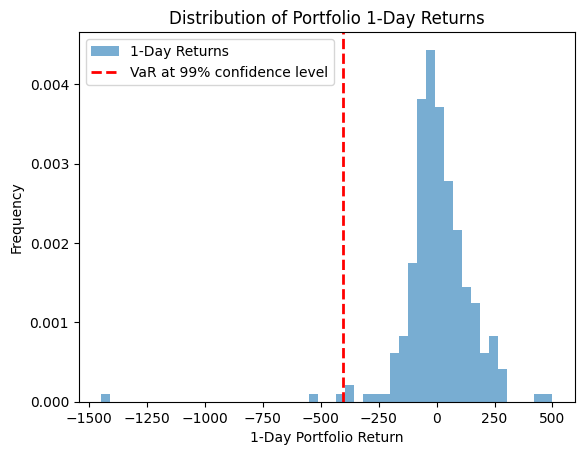

In [120]:
return_window=days
range_returns=historical_returns.rolling(window = return_window).sum()
range_returns=range_returns.dropna()

range_returns_value = range_returns * total_portfolio_value

plt.hist(range_returns_value.dropna(), bins=50, density=True, alpha=0.6, label=f'{days}-Day Returns')
plt.xlabel(f'{days}-Day Portfolio Return')  
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()